 This undertaking is a basic experiment aimed at assessing the feasibility of predicting the order parameter within the synchronization model of a first-order Kuramoto model. This model is numerically derived across one hundred Balanced Directed Smallworld networks, each with a size of 500. each network is solved via RK4 method on 100 different initial phases. targets are order parameter, coeficients of variation of order parameters and ratio of order parameters in every network. features are basic mathematical structure characteristics of networks (like clustering coeficients, avg shortest path, diameter and number of feedforward loops or feedback loops)

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import sys

from prettytable import PrettyTable

from sklearn.preprocessing import normalize
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [ ]:
### data loaded here for features and targets(18 features)
data = pd.read_csv("data_new1.csv")
data

,c_cycle,cv_cycle,c_mid,cv_mid,c_in,cv_in,c_out,cv_out,c_ug,cv_UG,...,cv_kout,shortest,diameter,FB,FF,sum_dfs,sum_ndfs,ravg,cv_ravg,ratio
0,0.251233,0.482421,0.279231,0.203739,0.347967,0.225266,0.347024,0.228824,0.603254,0.120123,...,0.071554,7.573547,16.0,1045.0,3471.0,488075.0,5.547529e+06,0.917716,0.071670,0.65
1,0.346194,0.218466,0.253293,0.190998,0.315567,0.194182,0.314667,0.191307,0.612880,0.111968,...,0.061968,7.618445,17.0,1438.0,3149.0,821258.0,1.003413e+07,0.794950,0.172574,0.89
2,0.252383,0.522536,0.280234,0.213532,0.349733,0.228883,0.349133,0.236852,0.605562,0.122557,...,0.068118,7.554104,15.0,1049.0,3481.0,485158.0,5.467258e+06,0.896564,0.096505,0.71
3,0.282439,0.436635,0.270894,0.221758,0.337067,0.235199,0.337300,0.231938,0.607049,0.115287,...,0.068118,7.447251,15.0,1171.0,3369.0,592521.0,6.890014e+06,0.818135,0.182052,0.83
4,0.232702,0.517985,0.290948,0.198327,0.363500,0.235057,0.362600,0.226042,0.613118,0.106044,...,0.068118,8.073479,17.0,964.0,3622.0,332145.0,4.241013e+06,0.849732,0.146169,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.305492,0.346361,0.260157,0.219653,0.324433,0.235733,0.322667,0.223594,0.601169,0.125052,...,0.068118,7.206024,14.0,1267.0,3229.0,570183.0,6.998145e+06,0.841497,0.166378,0.75
96,0.286677,0.371235,0.272533,0.205560,0.339933,0.213078,0.339833,0.212727,0.612264,0.108843,...,0.063246,7.818685,17.0,1186.0,3400.0,481551.0,5.878348e+06,0.918334,0.078844,0.64
97,0.309585,0.328777,0.266172,0.209087,0.331590,0.199574,0.331300,0.212073,0.614078,0.113491,...,0.059330,7.779735,17.0,1287.0,3306.0,738214.0,8.883724e+06,0.860202,0.113193,0.28
98,0.311587,0.283075,0.263626,0.193552,0.327800,0.205637,0.328667,0.201016,0.610605,0.119546,...,0.073756,7.584056,17.0,1291.0,3275.0,516513.0,6.294252e+06,0.871915,0.130015,0.73


In [ ]:
# Loading and splitting data


train, test = train_test_split(data, test_size=0.20, random_state=42)

print(train.shape,test.shape)

X_train = train.iloc[: , :18]
X_test = test.iloc[: , :18]
y_train = train.ravg
y_test = test.ravg

data

(80, 21) (20, 21)


,c_cycle,cv_cycle,c_mid,cv_mid,c_in,cv_in,c_out,cv_out,c_ug,cv_UG,...,cv_kout,shortest,diameter,FB,FF,sum_dfs,sum_ndfs,ravg,cv_ravg,ratio
0,0.251233,0.482421,0.279231,0.203739,0.347967,0.225266,0.347024,0.228824,0.603254,0.120123,...,0.071554,7.573547,16.0,1045.0,3471.0,488075.0,5.547529e+06,0.917716,0.071670,0.65
1,0.346194,0.218466,0.253293,0.190998,0.315567,0.194182,0.314667,0.191307,0.612880,0.111968,...,0.061968,7.618445,17.0,1438.0,3149.0,821258.0,1.003413e+07,0.794950,0.172574,0.89
2,0.252383,0.522536,0.280234,0.213532,0.349733,0.228883,0.349133,0.236852,0.605562,0.122557,...,0.068118,7.554104,15.0,1049.0,3481.0,485158.0,5.467258e+06,0.896564,0.096505,0.71
3,0.282439,0.436635,0.270894,0.221758,0.337067,0.235199,0.337300,0.231938,0.607049,0.115287,...,0.068118,7.447251,15.0,1171.0,3369.0,592521.0,6.890014e+06,0.818135,0.182052,0.83
4,0.232702,0.517985,0.290948,0.198327,0.363500,0.235057,0.362600,0.226042,0.613118,0.106044,...,0.068118,8.073479,17.0,964.0,3622.0,332145.0,4.241013e+06,0.849732,0.146169,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.305492,0.346361,0.260157,0.219653,0.324433,0.235733,0.322667,0.223594,0.601169,0.125052,...,0.068118,7.206024,14.0,1267.0,3229.0,570183.0,6.998145e+06,0.841497,0.166378,0.75
96,0.286677,0.371235,0.272533,0.205560,0.339933,0.213078,0.339833,0.212727,0.612264,0.108843,...,0.063246,7.818685,17.0,1186.0,3400.0,481551.0,5.878348e+06,0.918334,0.078844,0.64
97,0.309585,0.328777,0.266172,0.209087,0.331590,0.199574,0.331300,0.212073,0.614078,0.113491,...,0.059330,7.779735,17.0,1287.0,3306.0,738214.0,8.883724e+06,0.860202,0.113193,0.28
98,0.311587,0.283075,0.263626,0.193552,0.327800,0.205637,0.328667,0.201016,0.610605,0.119546,...,0.073756,7.584056,17.0,1291.0,3275.0,516513.0,6.294252e+06,0.871915,0.130015,0.73


In [ ]:
# A function for printing in better style

def add_scores(model_name,y_test_,y_pred_,item=''):

    global res
    if item=='':
        res.add_row([model_name,mean_absolute_error(y_test_, y_pred_),explained_variance_score(y_test_, y_pred_),r2_score(y_test_, y_pred_),np.sqrt(mean_squared_error(y_test_, y_pred_))])
    else:
        res.add_row([item,model_name,mean_absolute_error(y_test_, y_pred_),explained_variance_score(y_test_, y_pred_),r2_score(y_test_, y_pred_),np.sqrt(mean_squared_error(y_test_, y_pred_))])

    return mean_absolute_error(y_test_, y_pred_)


In [ ]:
#examinig diffenret models
res = PrettyTable(['Model Name', 'MAE','Explained variance score','r2 score','MSE'])



model = linear_model.BayesianRidge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
add_scores('BayesianRidge',y_test,y_pred)


model = linear_model.Lasso(alpha=0.001,random_state=1, tol=1e-15, max_iter=200000, positive=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
add_scores('Lasso',y_test,y_pred)


from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)
add_scores('LinearRegression',y_test,y_pred)
print(res)

+------------------+---------------------+--------------------------+-----------------------+----------------------+
|    Model Name    |         MAE         | Explained variance score |        r2 score       |         MSE          |
+------------------+---------------------+--------------------------+-----------------------+----------------------+
|  BayesianRidge   | 0.03781213138264909 |    0.2469278762751701    | -0.012625457869073209 | 0.044129304893728974 |
|      Lasso       | 0.04108596918975643 |   0.008577387453475582   |  -0.2390457674559352  | 0.04881421842831571  |
| LinearRegression | 0.04318047946037219 |   -0.5071195387753469    |  -0.6303512759387422  | 0.05599422779407886  |
+------------------+---------------------+--------------------------+-----------------------+----------------------+


0.9268487029609807 0.768383231791919
0.9230660105025716 0.788019690330457


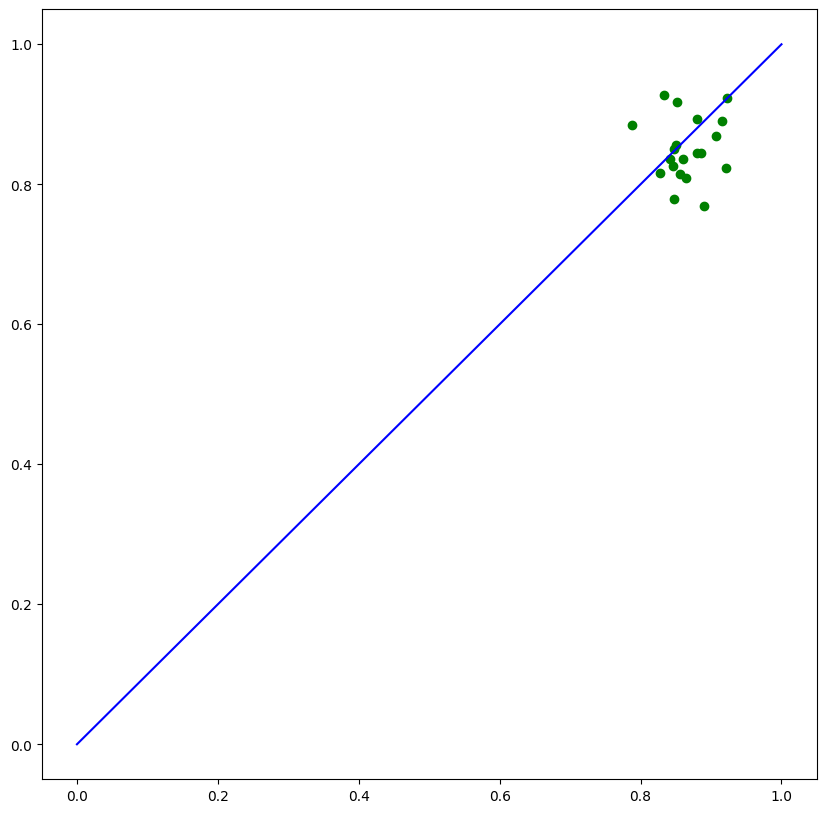

In [ ]:
# a simple prediction plot
plt.rcParams['figure.figsize'] = [10, 10]
fig, (ax1) = plt.subplots(1, 1)

ax1.scatter(y_pred, y_test, color="green")

ax1.plot([0,1],[0,1], color='blue')

print(max(y_test),min(y_test))
print(max(y_pred),min(y_pred))

In [ ]:
# Model using features separately
# proceeding with linear regression

res = PrettyTable(['Feature','Model Name', 'MAE','Explained variance score','r2 score','MSE'])


for i in range(18):

    X_train =np.array( train.iloc[: , i]).reshape(-1, 1)
    X_test = np.array( test.iloc[: , i]).reshape(-1, 1)
    y_train = train.ratio
    y_test = test.ratio


    from sklearn.linear_model import LinearRegression
    mlr = LinearRegression()
    mlr.fit(X_train, y_train)
    y_pred = mlr.predict(X_test)
    add_scores('LinearRegression',y_test,y_pred,str(i+1))


print(res)

+---------+------------------+---------------------+--------------------------+---------------------+---------------------+
| Feature |    Model Name    |         MAE         | Explained variance score |       r2 score      |         MSE         |
+---------+------------------+---------------------+--------------------------+---------------------+---------------------+
|    1    | LinearRegression | 0.13340615595558553 |  -0.026547373540673824   | -1.2819210268991945 |  0.1462712943410526 |
|    2    | LinearRegression |  0.1436670097150653 |   -0.10005140929825562   |  -1.558197016977715 | 0.15487302938595557 |
|    3    | LinearRegression | 0.13126775435034793 |  -0.022714610483629105   | -1.2454934122633916 | 0.14509909108392635 |
|    4    | LinearRegression | 0.13487619781506305 |  -0.013185528729747098   | -1.3077975860200342 |  0.147098301032078  |
|    5    | LinearRegression |  0.1330303730815539 |  -0.033995684118951264   | -1.2882587817551365 | 0.14647427875820437 |
|    6  

In [ ]:
# Model on all combinations along (1,...,10)

from itertools import combinations

input = range(18)

output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])[1:]
from sklearn.linear_model import LinearRegression
res = PrettyTable(['Feature', 'MAE'])

df=pd.DataFrame(columns=['Features','MAE'])
ii=0
for i in output:

    X_train = train.iloc[: , i]
    X_test = test.iloc[: , i]
    if len(i)<2:
        X_train=np.array(X_train).reshape(-1, 1)
        X_test = np.array(X_test).reshape(-1, 1)


    mlr = LinearRegression()
    mlr.fit(X_train, y_train)
    y_pred = mlr.predict(X_test)
    df.loc[ii]=[np.array(i)+1,mean_absolute_error(y_test, y_pred)]  #Add to a datafram to be sorted at the end
    ii+=1
    mlr=None

df=df.sort_values(by=['MAE'])  # sort the values ascending
df=df.reset_index()
for i in range(100):
    res.add_row([df.Features[i],round(df.MAE[i],4)])

print(res)
df.to_excel("LinearRegression_output.xlsx",index=False,columns=['Features','MAE'])   # save to an excel file

+------------------------------+--------+
|           Feature            |  MAE   |
+------------------------------+--------+
|     [ 3  5  7 11 12 18]      | 0.1051 |
|       [ 3  5  7 11 18]       | 0.1051 |
|    [ 3  5  6  7 11 15 18]    | 0.1057 |
|     [ 3  5  7 10 11 18]      | 0.1061 |
|    [ 1  3  5  6  7 11 18]    | 0.1063 |
|    [ 3  5  7 10 11 12 18]    | 0.1064 |
|    [ 3  5  6  7  9 11 18]    | 0.107  |
|       [ 3  7 11 12 18]       | 0.1071 |
|        [ 3  7 11 18]         | 0.1073 |
|  [ 1  3  5  6  7 10 11 18]   | 0.1077 |
|     [ 3  5  6  7 15 18]      | 0.1077 |
|  [ 3  5  6  7  9 10 11 18]   | 0.1078 |
|  [ 1  5  9 10 11 14 15 18]   | 0.1079 |
|  [ 3  5  6  7 10 11 15 18]   | 0.1079 |
|     [ 3  5  7  9 11 18]      | 0.1081 |
|       [11 12 13 14 18]       | 0.1082 |
|     [ 1  3  5  7 11 18]      | 0.1083 |
|    [ 1  3  6  7  9 11 18]    | 0.1083 |
|     [ 3  5  7 11 15 18]      | 0.1083 |
|       [ 3  7 10 11 18]       | 0.1083 |
|     [ 3  7 10 11 12 18]      | 0